In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [147]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [148]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [149]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [150]:
df.shape

(200, 5)

In [151]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [152]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# TRAIN TEST SPLIT

In [3]:
from sklearn.model_selection import train_test_split

x = df.drop('Spending Score (1-100)', axis=1)
y = df['Spending Score (1-100)']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)

print("Shape of data : ", df.shape)
print("x_train shape : " , x_train.shape)
print("x_test shape : ", x_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

Shape of data :  (200, 5)
x_train shape :  (150, 4)
x_test shape :  (50, 4)
y_train shape :  (150,)
y_test shape :  (50,)


# CORRELATION MATRIX

<Axes: >

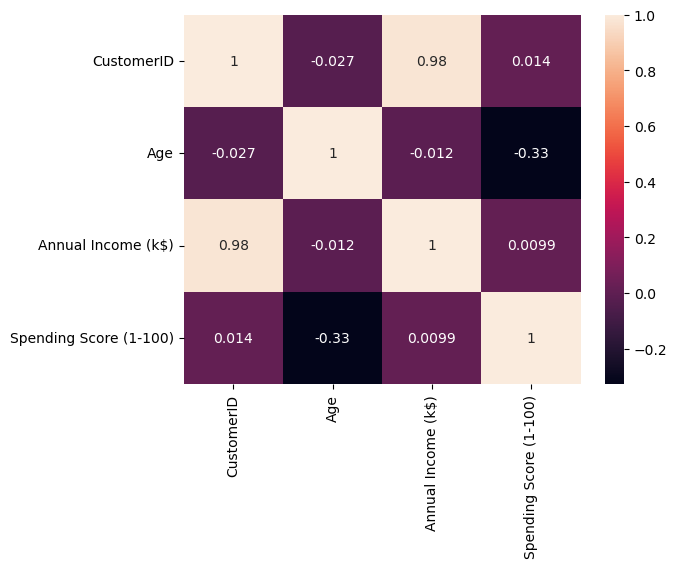

In [18]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)

# SCATTER PLOT

<Axes: >

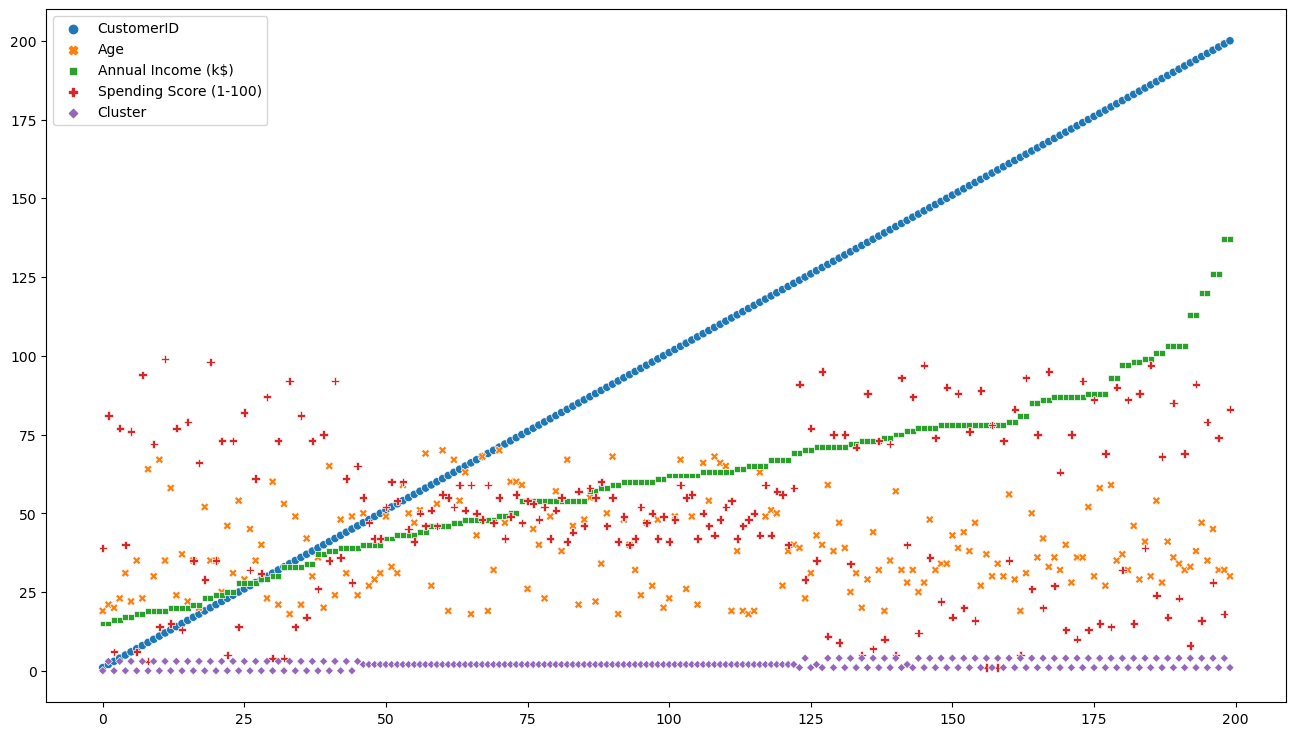

In [72]:
plt.figure(figsize=(16, 9))
sns.scatterplot(df)

# PAIR PLOT

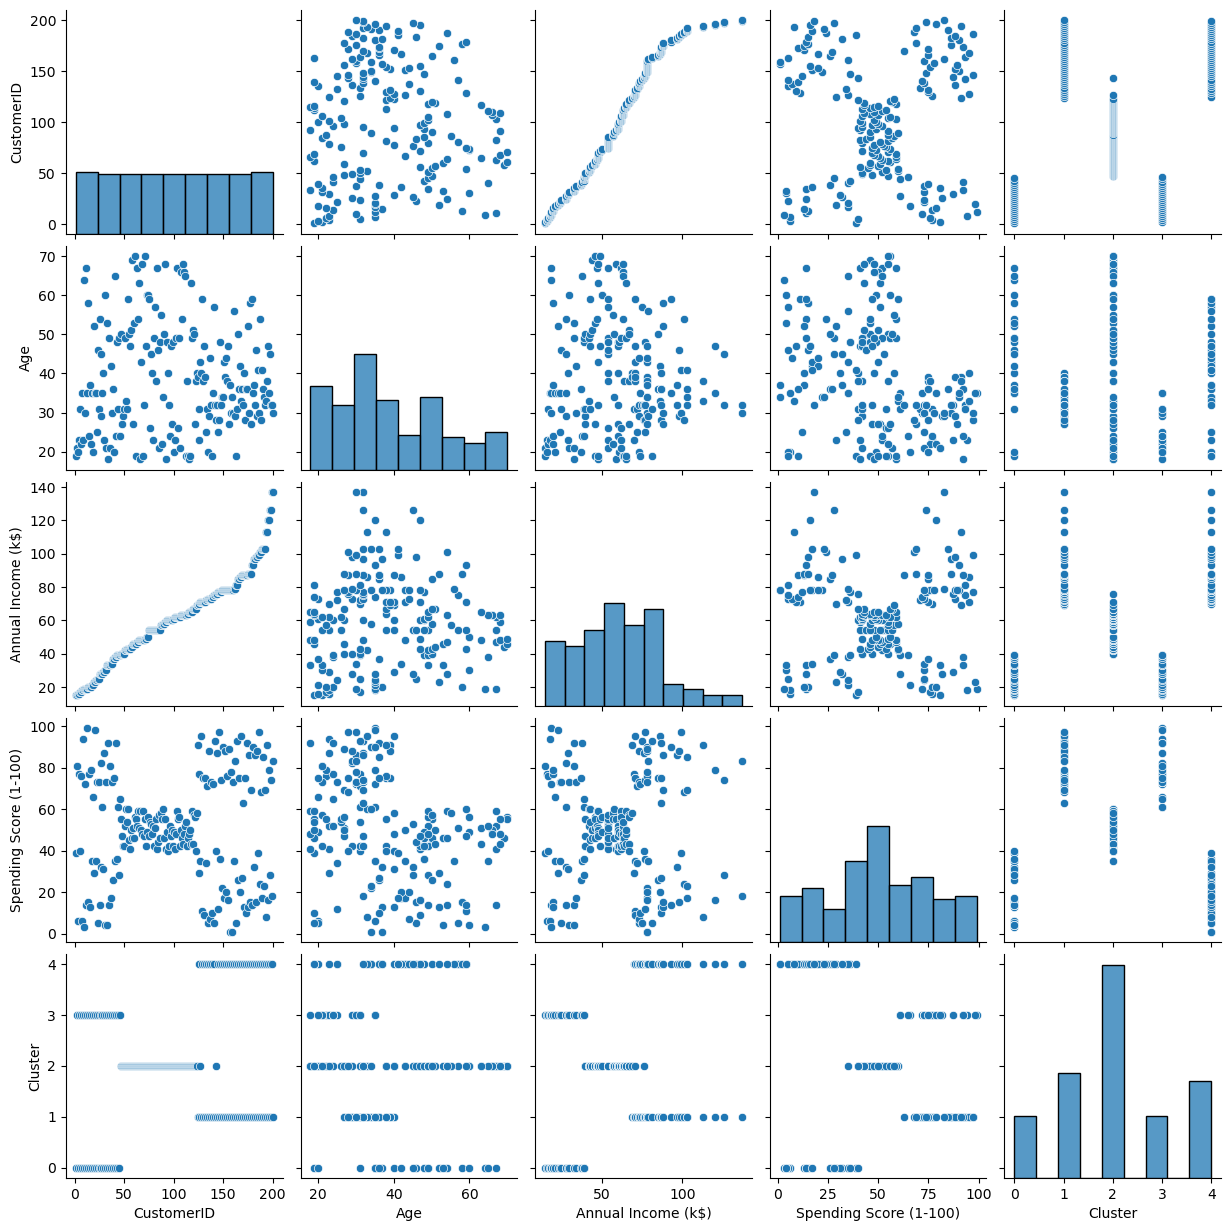

In [98]:
sns.pairplot(df)

# BOX PLOT

<Axes: >

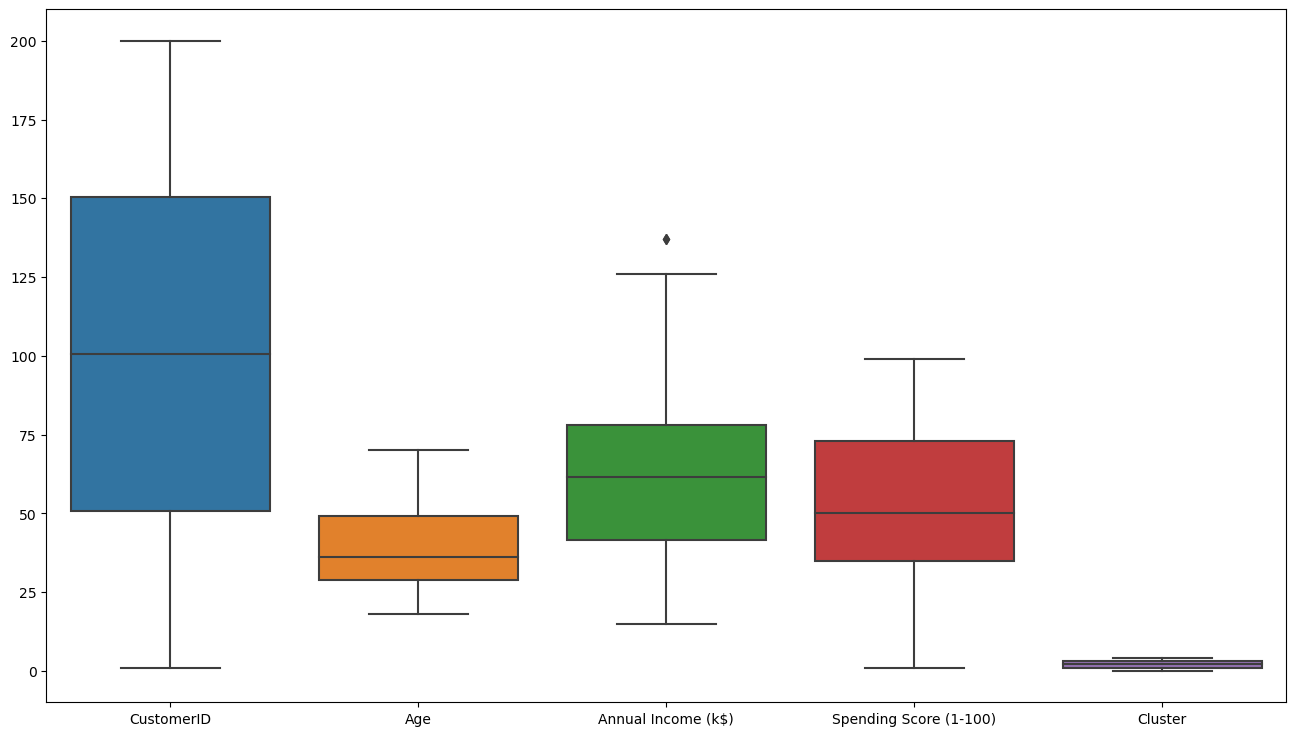

In [101]:
plt.figure(figsize=(16,9))
sns.boxplot(df)

# PIE CHART

<Axes: ylabel='Genre'>

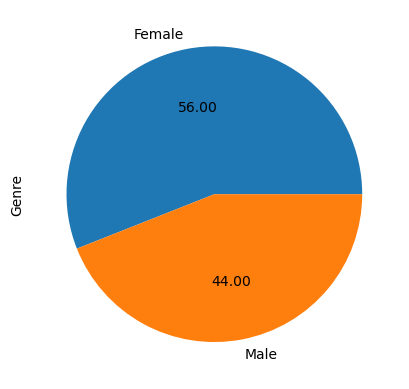

In [10]:
df['Genre'].value_counts().plot(kind = 'pie', autopct = '%.2f')

<Axes: ylabel='Genre'>

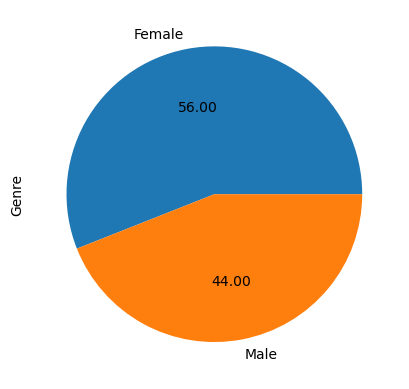

In [16]:
pi=df["Genre"].value_counts()
pi.plot(kind="pie", autopct="%.2f")

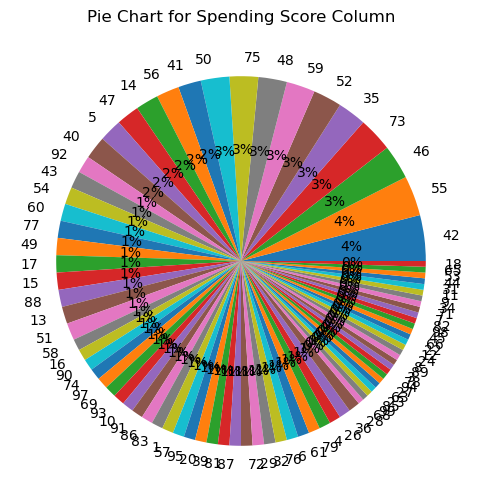

In [130]:
keys = ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']
value_counts = df['Spending Score (1-100)'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%.0f%%')
plt.title('Pie Chart for Spending Score Column') 
plt.show()

# HISTOGRAM 

<Axes: ylabel='Count'>

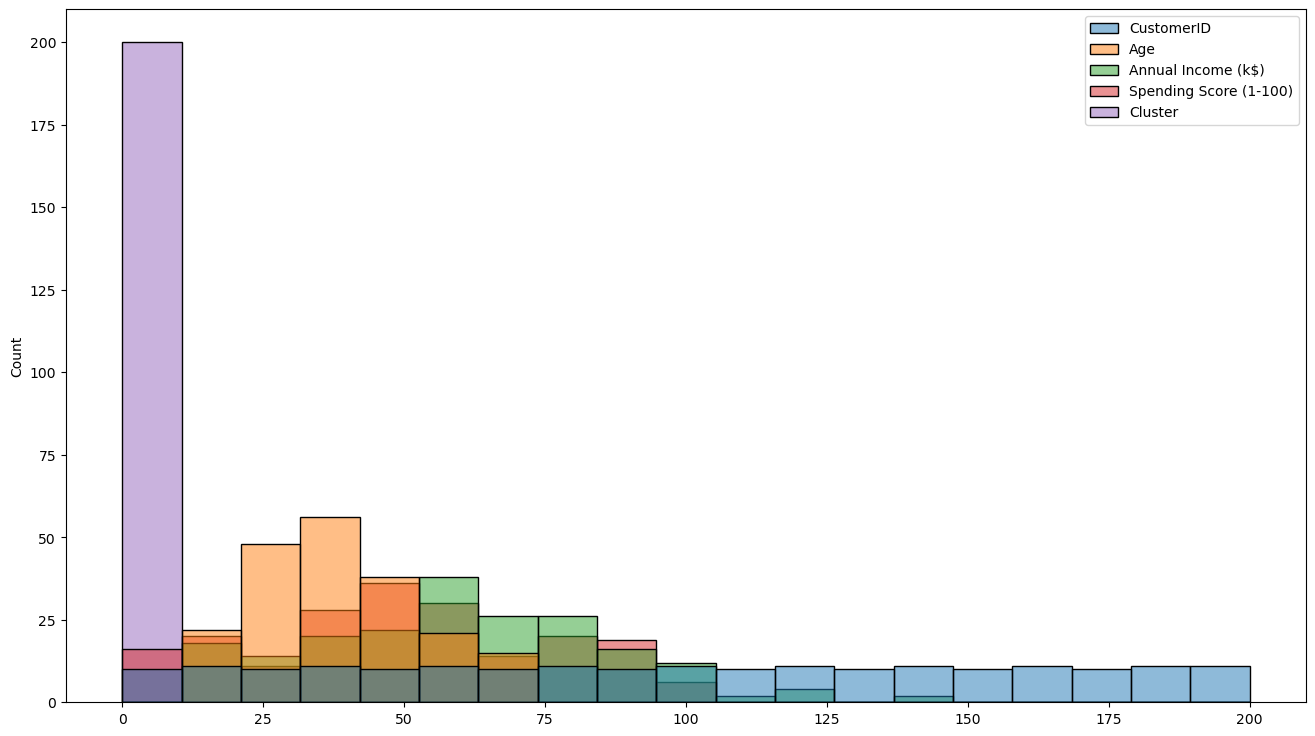

In [109]:
plt.figure(figsize=(16,9))
sns.histplot(df)

# KERNEL DENSITY

<Axes: ylabel='Density'>

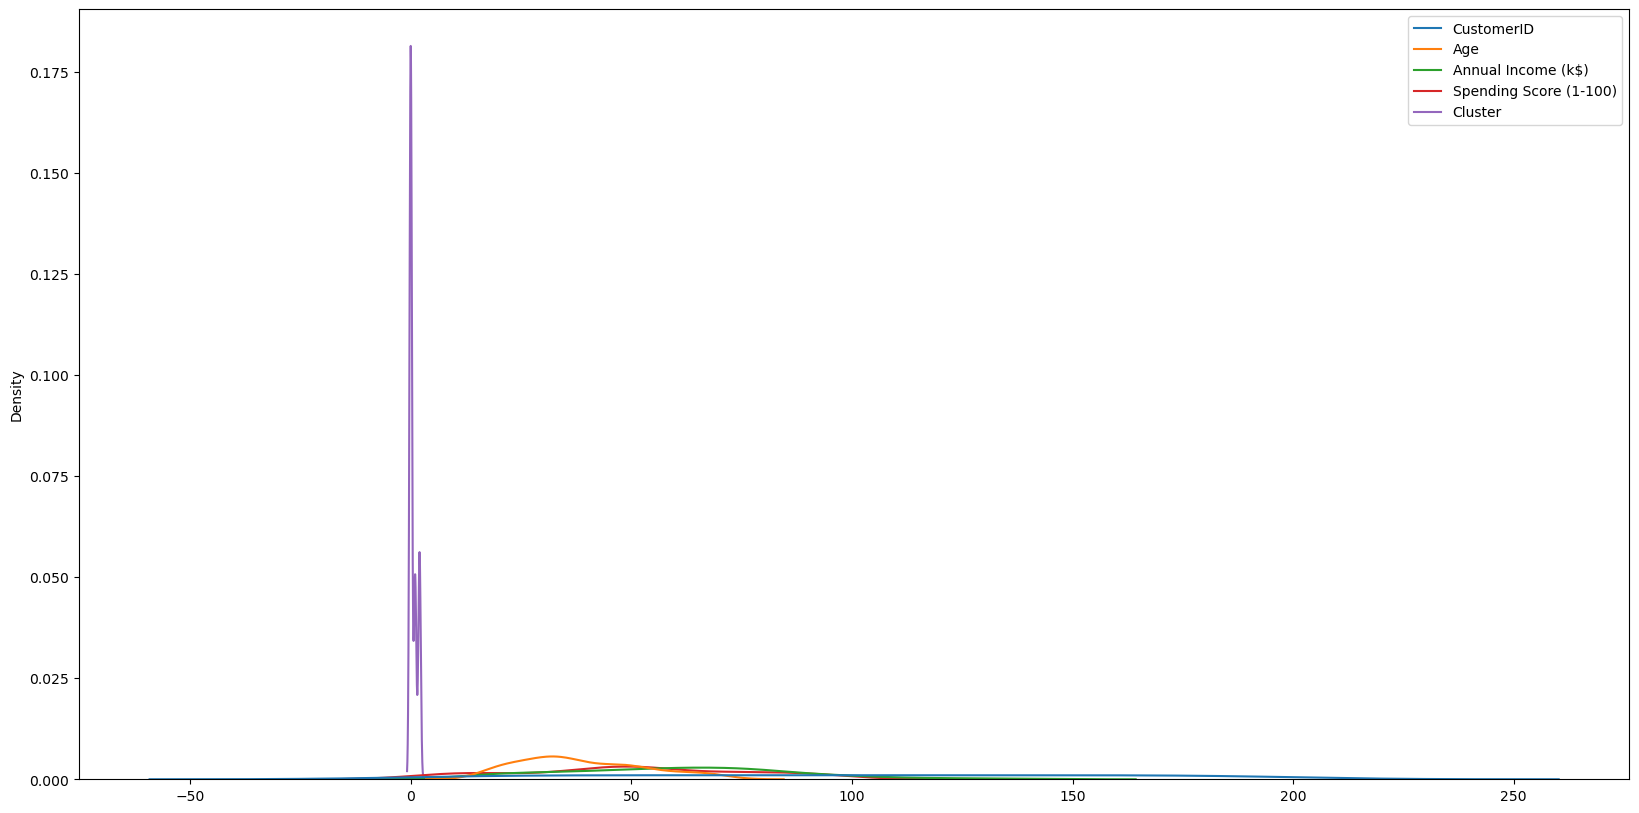

In [128]:
plt.figure(figsize = (20,10))
sns.kdeplot(df)

# BAR GRAPH

<Axes: >

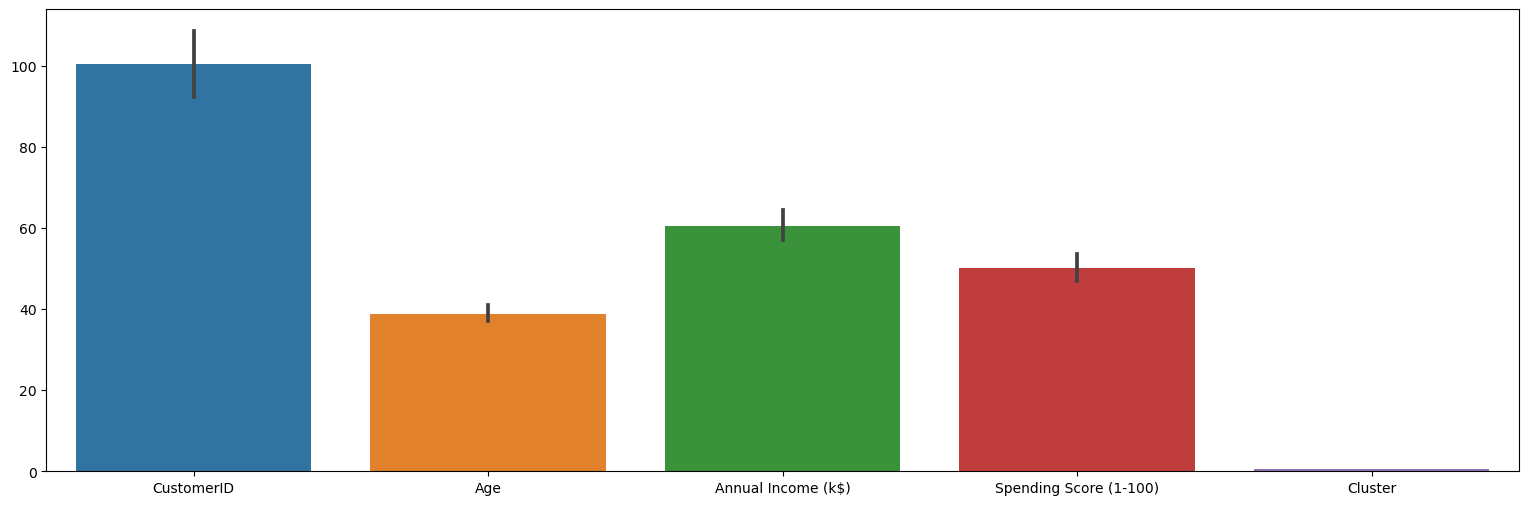

In [129]:
plt.figure(figsize = (19,6))
sns.barplot(df)

In [4]:
# Selecting the relevant features for clustering (Age, Annual Income, Spending Score)
# x = df.iloc[:, [2, 3, 4]].values
x = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Finding the optimal number of clusters using the elbow method
wcss = []    # within-cluster sum of square

# Finding sum of squared error for KMeans clusters from 1 to 10 randomly
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\thite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\thite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

# ELBOW GRAPH

# - (to find optimal number of clusters )

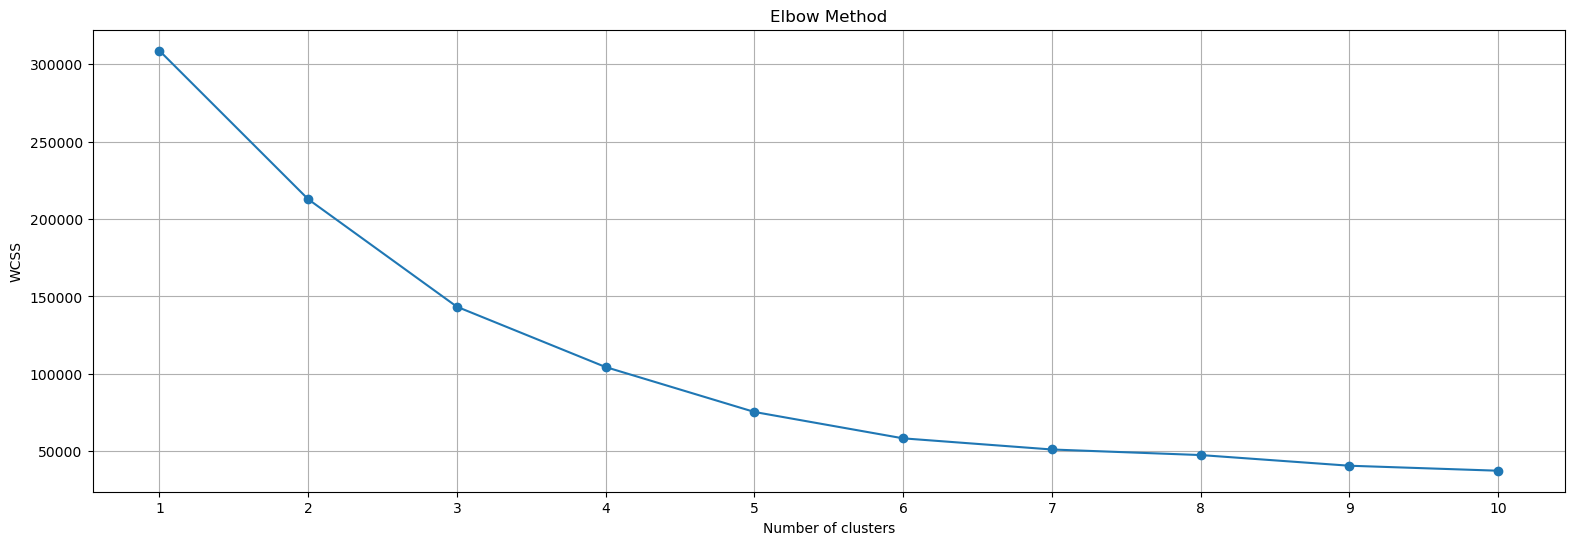

In [204]:
# Plot the elbow graph to find the optimal number of clusters
plt.figure(figsize=(19,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.grid()
plt.xticks(range(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# K MEANS

In [192]:
# Based on the elbow graph, choose the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, max_iter=100, n_init=10, random_state=0)

# Fit the K-Means model to your data
kmeans.fit(x)

# Adding cluster labels to your dataset
df['Cluster'] = kmeans.labels_

df

C:\Users\thite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,0


In [185]:
df["Cluster"].unique()

array([2, 1, 0])

In [195]:
kmeans.inertia_

143342.751571706

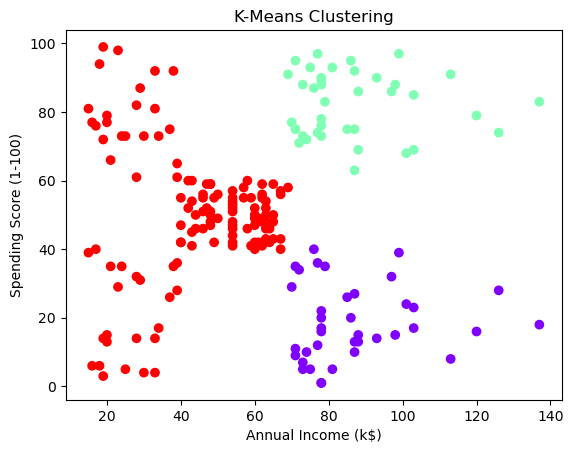

In [186]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=kmeans.labels_, label=kmeans.labels_, cmap="rainbow")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering")
plt.show()

In [197]:
# Based on the elbow graph, choose the optimal number of clusters (e.g., 5)
kmeans = KMeans(n_clusters=5, max_iter=20, n_init=20, random_state=0)

# Fitting the K-Means model 
kmeans.fit(x)

# Adding cluster labels
df['Cluster'] = kmeans.labels_

df

C:\Users\thite\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,4
197,198,Male,32,126,74,1
198,199,Male,32,137,18,4


In [198]:
df["Cluster"].unique()

array([0, 3, 2, 1, 4])

In [199]:
kmeans.inertia_

75350.77917248776

# SCATTER PLOT 1

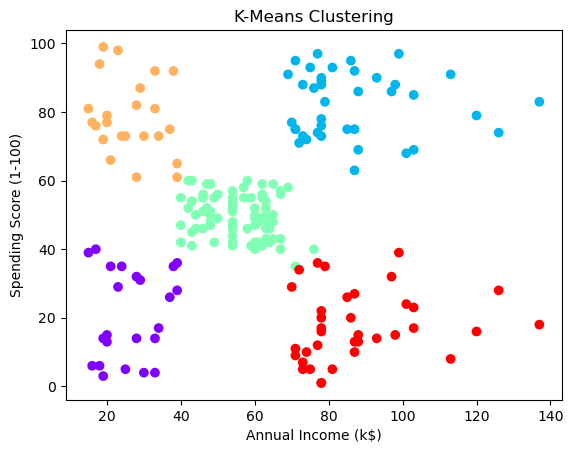

In [162]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=kmeans.labels_, cmap="rainbow")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering")
plt.show()

# DENDROGRAM

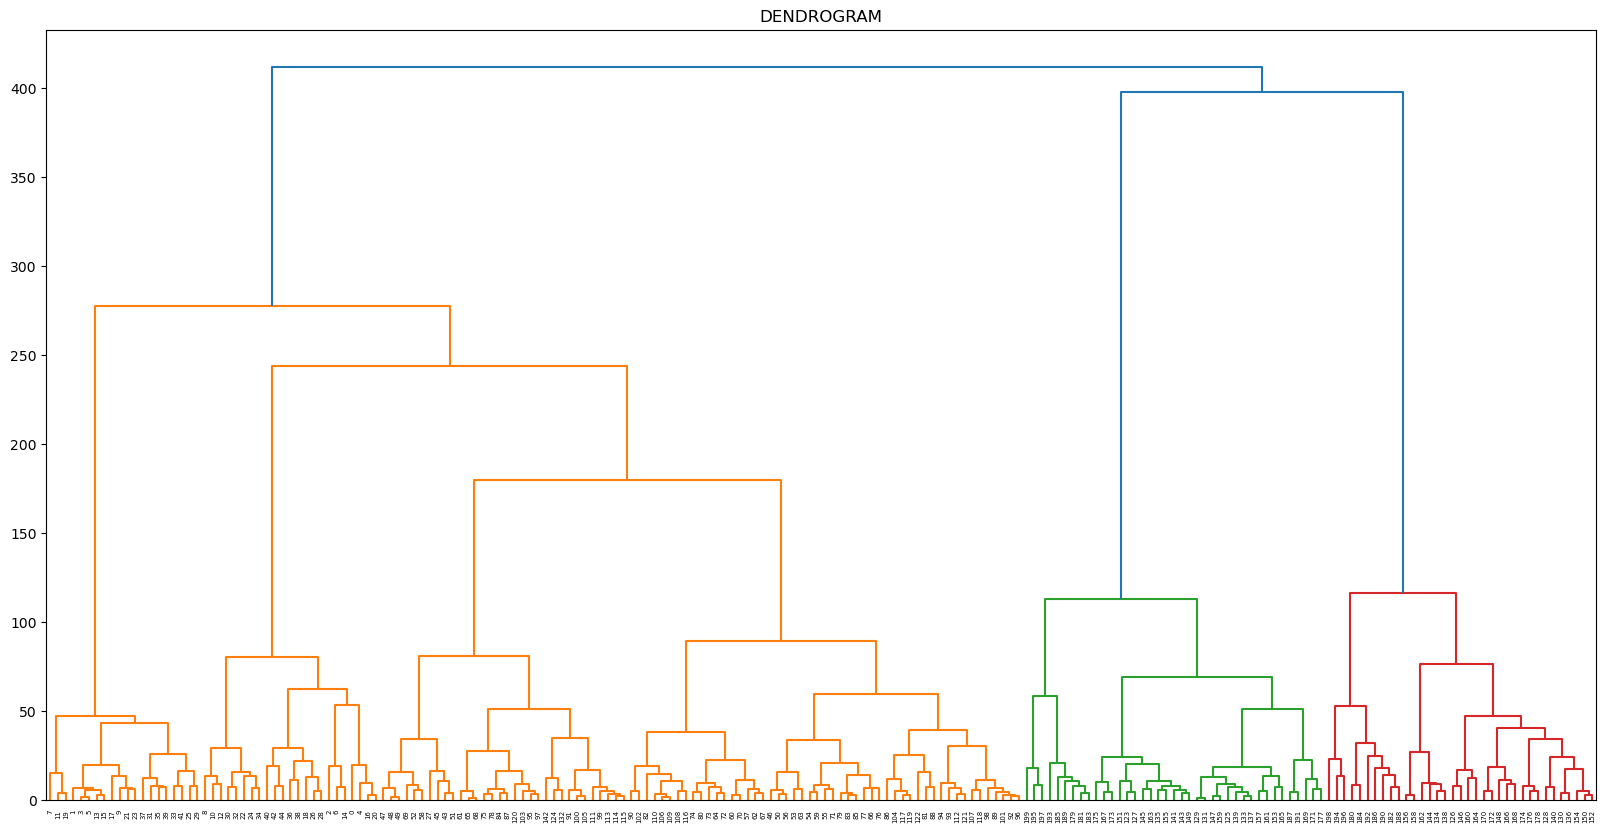

In [84]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(20,10))
d = linkage(x,"ward")
dendrogram(d)
plt.title("DENDROGRAM")
plt.show()

# AGGLOMERATIVE CLUSTERING

In [171]:
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(x)
df['Cluster'] = agglo.labels_
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


In [120]:
df['Cluster'].unique()

array([0, 2, 1], dtype=int64)

# SCATTER PLOT 2

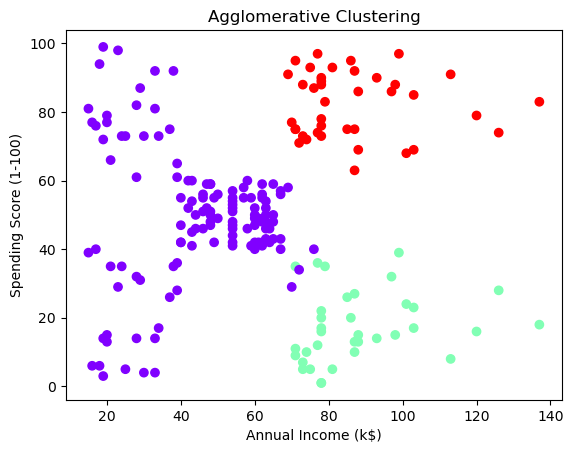

In [137]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=agglo.labels_, cmap="rainbow")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Agglomerative Clustering")
plt.show()

# DENDROGRAM 

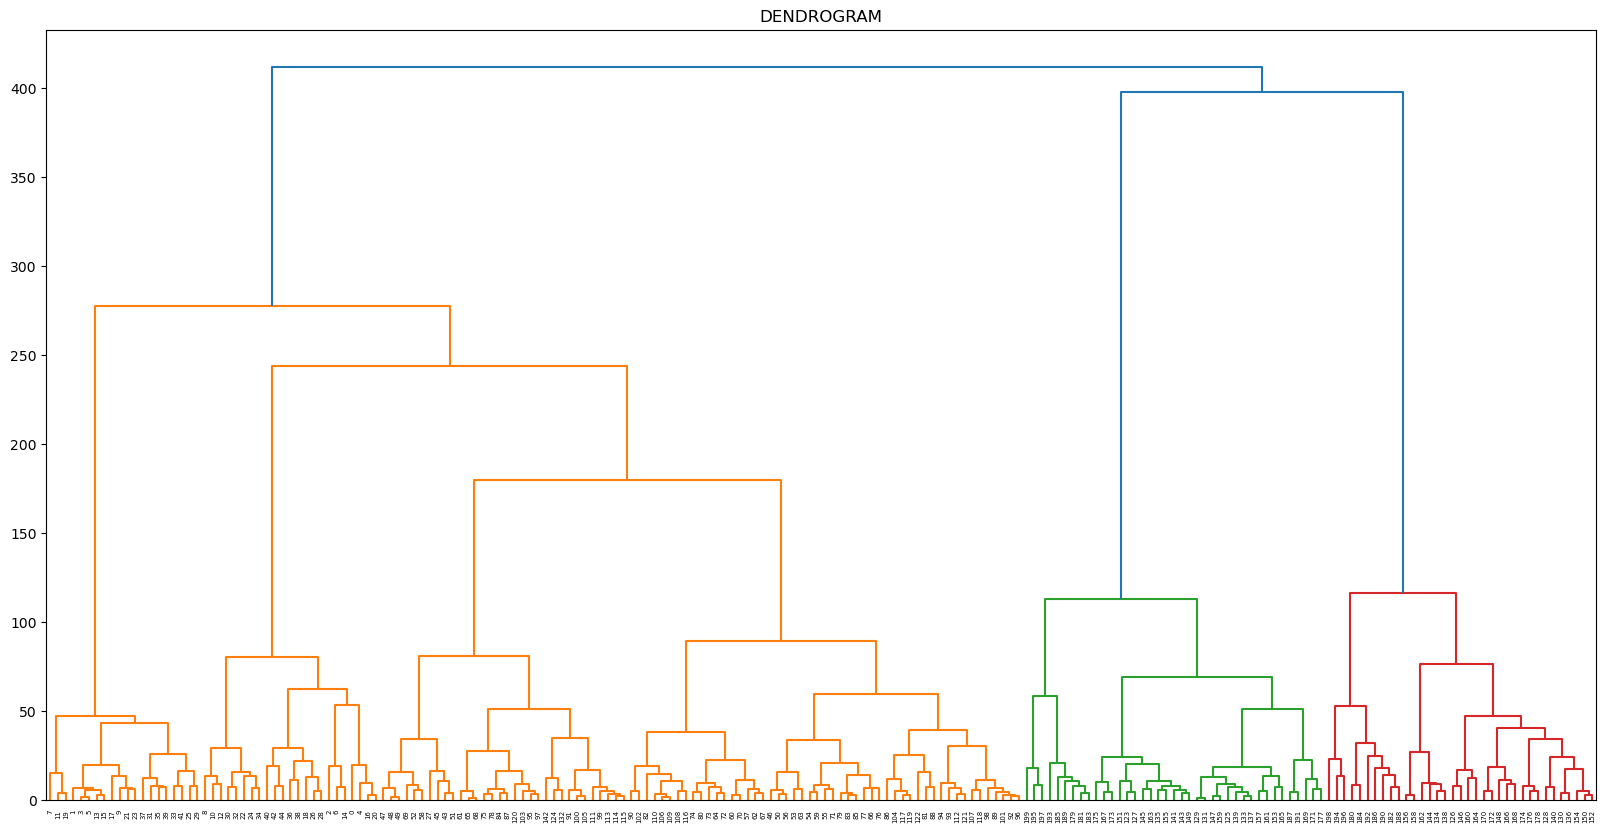

In [140]:
plt.figure(figsize=(20,10))
d = linkage(x,"ward")
dendrogram(d)
plt.title("DENDROGRAM")
plt.show()

In [177]:
df[df['Cluster']==0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
121,122,Female,38,67,40,0
122,123,Female,40,69,58,0
124,125,Female,23,70,29,0
132,133,Female,25,72,34,0


In [178]:
df[df['Cluster']==1]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
126,127,Male,43,71,35,1
128,129,Male,59,71,11,1
130,131,Male,47,71,9,1
134,135,Male,20,73,5,1
136,137,Female,44,73,7,1
138,139,Male,19,74,10,1
140,141,Female,57,75,5,1
144,145,Male,25,77,12,1
146,147,Male,48,77,36,1
148,149,Female,34,78,22,1


In [179]:
df[df['Cluster']==2]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,2
125,126,Female,31,70,77,2
127,128,Male,40,71,95,2
129,130,Male,38,71,75,2
131,132,Male,39,71,75,2
133,134,Female,31,72,71,2
135,136,Female,29,73,88,2
137,138,Male,32,73,73,2
139,140,Female,35,74,72,2
141,142,Male,32,75,93,2
